# Feature extraction

The source data does not usually come in a correct format. We have to extract what we think are potentially useful features and convert them to our learning format. This process is called feature extraction or feature engineering.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
titanic = pd.read_csv('./titanic.csv')

In [64]:
titanic.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [65]:
titanic.shape

(1313, 11)

In [66]:
print titanic.columns

Index([u'row.names', u'pclass', u'survived', u'name', u'age', u'embarked',
       u'home.dest', u'room', u'ticket', u'boat', u'sex'],
      dtype='object')


In [67]:
print titanic.index

RangeIndex(start=0, stop=1313, step=1)


In [68]:
from sklearn import feature_extraction

In [69]:
def one_hot_dataframe(data, cols, replace=False):
    vec = feature_extraction.DictVectorizer()
    mkdict = lambda row: dict((col, row[col]) for col in cols)
    vecData = pd.DataFrame(vec.fit_transform(data[cols].apply(mkdict, axis=1)).toarray())
    vecData.columns = vec.get_feature_names()
    vecData.index = data.index
    if replace:
        data = data.drop(cols, axis=1)
        data = data.join(vecData)
    return data, vecData

In [70]:
titanic, titanic_n = one_hot_dataframe(titanic, ['pclass','embarked','sex'], replace=True)

In [71]:
titanic.describe()

,row.names,survived,age,embarked,embarked=Cherbourg,embarked=Queenstown,embarked=Southampton,pclass=1st,pclass=2nd,pclass=3rd,sex=female,sex=male
count,1313.000000,1313.000000,633.000000,821.0,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,657.000000,0.341965,31.194181,0.0,0.154608,0.034273,0.436405,0.245240,0.213252,0.541508,0.352628,0.647372
std,379.174762,0.474549,14.747525,0.0,0.361668,0.181998,0.496128,0.430393,0.409760,0.498464,0.477970,0.477970
min,1.000000,0.000000,0.166700,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,329.000000,0.000000,21.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,657.000000,0.000000,30.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,985.000000,1.000000,41.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1313.000000,1.000000,71.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
titanic, titanic_n = one_hot_dataframe(titanic, ['home.dest', 'room', 'ticket', 'boat'], replace=True)

In [73]:
titanic.describe()

,row.names,survived,age,embarked,embarked=Cherbourg,embarked=Queenstown,embarked=Southampton,pclass=1st,pclass=2nd,pclass=3rd,...,ticket=248744 L13,ticket=248749 L13,ticket=250647,ticket=27849,ticket=28220 L32 10s,ticket=34218 L10 10s,ticket=36973 L83 9s 6d,ticket=392091,ticket=7076,ticket=L15 1s
count,1313.000000,1313.000000,633.000000,821.0,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,...,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,657.000000,0.341965,31.194181,0.0,0.154608,0.034273,0.436405,0.245240,0.213252,0.541508,...,0.000762,0.000762,0.000762,0.000762,0.002285,0.000762,0.001523,0.001523,0.000762,0.000762
std,379.174762,0.474549,14.747525,0.0,0.361668,0.181998,0.496128,0.430393,0.409760,0.498464,...,0.027597,0.027597,0.027597,0.027597,0.047764,0.027597,0.039014,0.039014,0.027597,0.027597
min,1.000000,0.000000,0.166700,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,329.000000,0.000000,21.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,657.000000,0.000000,30.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,985.000000,1.000000,41.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1313.000000,1.000000,71.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
mean = titanic['age'].mean()

In [75]:
titanic['age'].fillna(mean, inplace=True)
titanic.fillna(0, inplace = True)

In [76]:
titanic.head()

,row.names,survived,name,age,embarked,embarked=Cherbourg,embarked=Queenstown,embarked=Southampton,pclass=1st,pclass=2nd,...,ticket=248744 L13,ticket=248749 L13,ticket=250647,ticket=27849,ticket=28220 L32 10s,ticket=34218 L10 10s,ticket=36973 L83 9s 6d,ticket=392091,ticket=7076,ticket=L15 1s
0,1,1,"Allen, Miss Elisabeth Walton",29.0000,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,"Allison, Miss Helen Loraine",2.0000,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,"Allison, Mr Hudson Joshua Creighton",30.0000,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,"Allison, Master Hudson Trevor",0.9167,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split data into train and test

In [77]:
from sklearn.cross_validation import train_test_split

In [78]:
titanic_target = titanic['survived']

In [79]:
titanic_data = titanic.drop(['name','row.names', 'survived'], axis=1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(titanic_data, titanic_target, test_size = 0.25, random_state=33)

# Train model use training data

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dtc = DecisionTreeClassifier(criterion='entropy')

In [83]:
dtc = dtc.fit(X_train, y_train)

# Evaluate model use test data

In [84]:
from sklearn import metrics

In [85]:
y_pred = dtc.predict(X_test)

In [86]:
print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y_test, y_pred))

Accuracy:0.830


In [87]:
print titanic.columns.shape

(581,)


# Feature selection

In [88]:
from sklearn import feature_selection

In [89]:
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=20)

In [90]:
X_train_fs = fs.fit_transform(X_train, y_train)

In [91]:
print X_train_fs

[[ 31.19418104   0.           0.         ...,   0.           0.           0.        ]
 [ 31.19418104   1.           0.         ...,   0.           0.           0.        ]
 [ 31.19418104   0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [ 12.           0.           1.         ...,   0.           0.           0.        ]
 [ 18.           0.           1.         ...,   0.           0.           0.        ]
 [ 31.19418104   0.           0.         ...,   0.           0.           0.        ]]


In [92]:
dtc = dtc.fit(X_train_fs, y_train)

In [93]:
X_test_fc = fs.transform(X_test)

In [94]:
y_pred_fc = dtc.predict(X_test_fc)

In [95]:
print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y_test, y_pred_fc))

Accuracy:0.842


# Cross-validation

In [96]:
from sklearn.cross_validation import cross_val_score, KFold

In [97]:
percentiles = range(1, 100 , 5)

The best percentile is 66


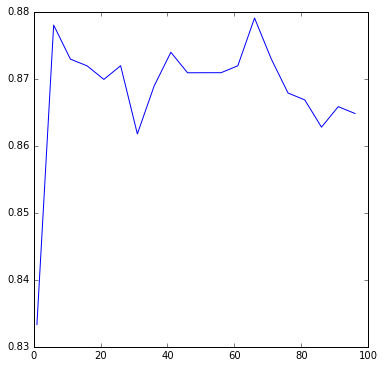

In [98]:
results = []
for i in range(1,100,5):
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train,y_train)
    dtc = dtc.fit(X_train_fs, y_train)
    #cv = KFold(X_train_fs.shape[0], 5, shuffle=True, random_state=42)
    scores = cross_val_score(dtc, X_train_fs, y_train, cv=5)
    results.append(np.mean(scores))

indexMax = results.index(max(results))
print "The best percentile is {}".format(percentiles[indexMax])
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(percentiles, results,'-b')

# Evaluate by testing data

In [99]:
fs = feature_selection.SelectPercentile(score_func=feature_selection.chi2, percentile=percentiles[indexMax])

In [100]:
X_train_fs = fs.fit_transform(X_train, y_train)

In [101]:
dtc.fit(X_train_fs, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [102]:
X_test_fs = fs.transform(X_test)

In [103]:
y_pred = dtc.predict(X_test_fs)

In [104]:
print "Accuracy is {0:.3f}".format(metrics.accuracy_score(y_test, y_pred))

Accuracy is 0.854
